# Image classifier using least squares method

In [1]:
import numpy as np

Let's build a simple classifier based on least square method.

The data which we are using is written into two files - mnist_train.csv and mnist_test.csv. 
You can download it here: https://pjreddie.com/projects/mnist-in-csv/

Attention! Reading data from csv files requires a lot of memory (up to couple of gigabytes) and computation power, run the following block of code only once.

In [2]:
def load_train_data():
    """
    reads csv file with train dataset
    csv file should be located in the same directory with notebook
    """
    return np.genfromtxt("mnist_train.csv", delimiter=',')

def load_test_data():
    """
    reads csv file with test dataset
    csv file should be located in the same directory with notebook
    """
    return np.genfromtxt("mnist_test.csv", delimiter=',')

In [3]:
train_data = load_train_data()
test_data = load_test_data()

In [4]:
def select_images_and_labels_from_dataset(data, shape):
    """selects rundom images from dataset"""
    old_shape = data.shape[0]
    indexces = np.random.choice(old_shape, shape, replace=False)
    labels = data[indexces, 0].astype(int)
    images = data[indexces, 1:]
    return labels, images

def get_train_labels_and_images():
    """selects random images from train data"""
    return select_images_and_labels_from_dataset(train_data, N_train)

def get_test_labels_and_images():
    """selects random images from test data"""
    return select_images_and_labels_from_dataset(test_data, N_test)

Now, let's define the amount of images we will use to train the classifier and test it.
After that we will load train and test data and select rundom images from those datasets.

As you will see, there are 60k and 10k vectors in train and test data respectively. Each vector contains 785 values and represents an image 28X28 with a lable. First value in a vector is lables of an image - digit from 0 to 9, next 784 values are image data.

In [5]:
N_train = 10000
N_test = 1000
train_labels, train_images = get_train_labels_and_images()
test_labels, test_images = get_test_labels_and_images()

The algorythm of classfifier is the following:
1. Select test image from test images
2. Find the distances from selected image to train images
3. Find minimum distance and return it's label from train labels

In [6]:
def classify_image(test_image, train_images, train_labels):
    DM = np.square(test_image - train_images).sum(axis=1)
    index = DM.argmin(axis=0)
    return train_labels[index]

In [7]:
predicted_results = [classify_image(test_image, train_images, train_labels) for test_image in test_images]

Let's calculate the accuracy of our algorythm:

In [8]:
accuracy = (predicted_results == test_labels).sum() / N_test
print("SAMPLES COUNT:", N_train)
print("TEST COUNT:", N_test)
print("ACCURACY:", np.round(accuracy * 100, 2), '%')

SAMPLES COUNT: 10000
TEST COUNT: 1000
ACCURACY: 95.1 %


However, how we can maximise the accuracy? We will see how the size of train data influences the accuracy of image prediction.

In [9]:
def run_train_itteration(N_train, test_images, test_labels):
    train_labels, train_images = select_images_and_labels_from_dataset(train_data, N_train)
    predicted_results = [classify_image(test_image, train_images, train_labels) for test_image in test_images]
    accuracy = (predicted_results == test_labels).sum() / test_images.shape[0]
    return accuracy

def  get_average_accuracy(N_train, amount_of_iterations):
    accuracies = [run_train_itteration(N_train, test_images, test_labels) for _ in range(amount_of_iterations)]
    return sum(accuracies) / amount_of_iterations

In [10]:
size_of_subset_v = [50,  200, 500, 1000, 2000, 5000, 10000]
count_of_iters_v = [100, 40,  20,  10,   5,   2,    1]

test_labels, test_images = get_test_labels_and_images()
accuracies = [get_average_accuracy(size, iters)
                    for size, iters in zip(size_of_subset_v, count_of_iters_v)]

Now let's visualize results with mathplotlib. Note that x-axis is logarithmically scaled.

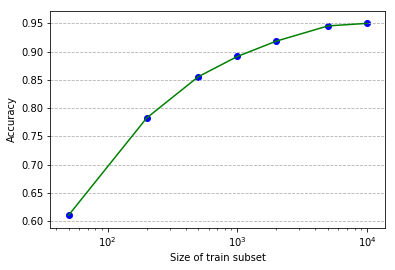

In [12]:
import matplotlib.pyplot as plt

plt.semilogx(size_of_subset_v, accuracies, color = "g")
plt.scatter(size_of_subset_v, accuracies, color = "b")

plt.xlabel("Size of train subset")
plt.ylabel("Accuracy")
plt.grid(axis="y", which="both", linestyle='--')

plt.show()